# ML4SCI Evaluation TASK

- Submission by:  `Hassan Raza Bukhari`
- Organization Name: `Machine Learning for Science (ML4SCI)`
- Project Name : `Dimensionality Reduction for Studying Diffuse Circumgalactic Medium`

# Task 1

A = **O II** 

B = **C II** 

C = **H I**

D = **C II** 

E = **N II** 

# Task 2

Importing dependencies

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Starting with writing a function to calculate the `absorption coefficient` alpha

In [3]:
def alpha_calculator(v, v_not=2.46607E15):
    nh = 0.1
    x = 0.1
    t = 6.265E8
    f = 0.4164
    g_not = 2
    Z = 2.0
    m_e = 9.11E-28
    c = 3.0E10
    e = 4.80E-10
    pi = 3.1415926
    f1 = ((e**2)*f*nh) / (4*pi*m_e*c)
    f2 = ((1-x)*g_not) / Z
    f3 = t / ((v-v_not)**2 + (t/(4*pi))**2)
    alpha = f1*f2*f3
    return alpha

In [4]:
# Testing the function
alpha_calculator(3.0E10 / 4.1E-5)

5.2363353345594585e-27

In [5]:
# Calculating intensity 
def Intensity_calculator(lam, d, v_not = 2.46607E15):
    c = 3.0E10
    v = c / (lam)
    alpha = alpha_calculator(v, v_not)
    I = np.exp(-alpha*d)
    return I

In [6]:
# Testing
Intensity_calculator(3.0E10 / 4.1E-5, 1.0E14)

0.999999999999741

In [22]:
def spectrum_plot(d, v_not=2.46607E15):
    lam_nm = [x for x in range(1,2000)]
    
    # using cm because of the units already used
    lam_cm = [x*1.0E-7 for x in lam_nm]
    intensity = []
    for lam in lam_cm:
        intensity.append(Intensity_calculator(lam, d, v_not))
    plt.figure(figsize=(16,10), dpi= 80)
    plt.xlabel("Wavelength (cm)")
    plt.ylabel("Intensity")
    plt.plot(lam_cm, intensity)

**Part 1**

Plotting for 10<sup>14</sup>

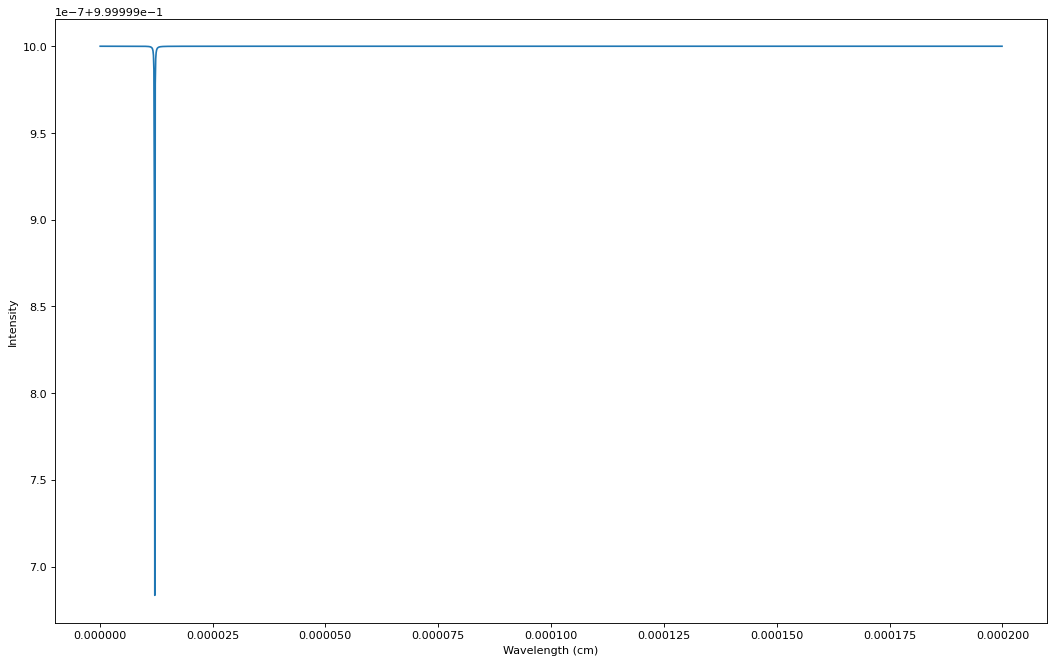

In [23]:
spectrum_plot(10.0E14)

Plotting for 10<sup>18</sup>

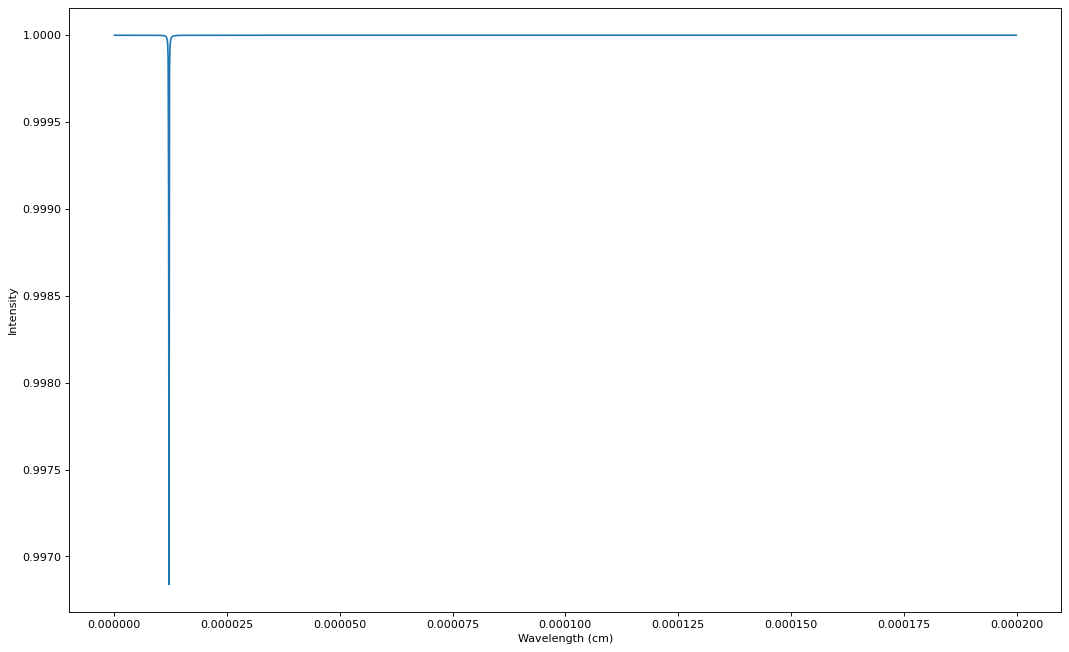

In [24]:
spectrum_plot(10.0E18)

Plotting for 10<sup>21</sup>

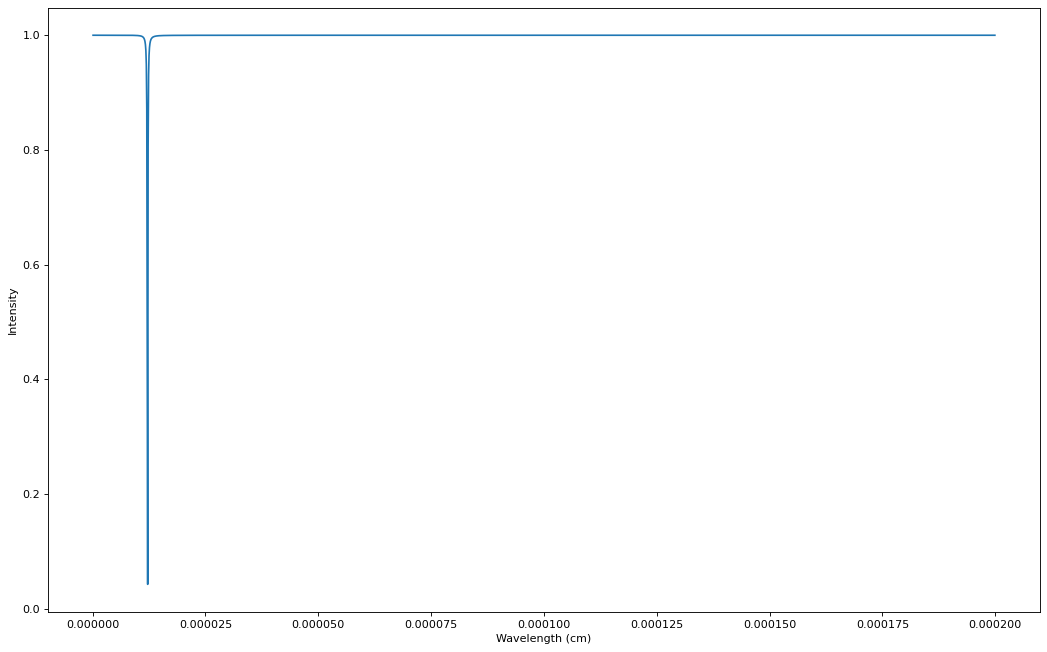

In [25]:
spectrum_plot(10.0E21)

**Part 2**

Plotting for 10<sup>14</sup> with updated v<sub>0</sub> value

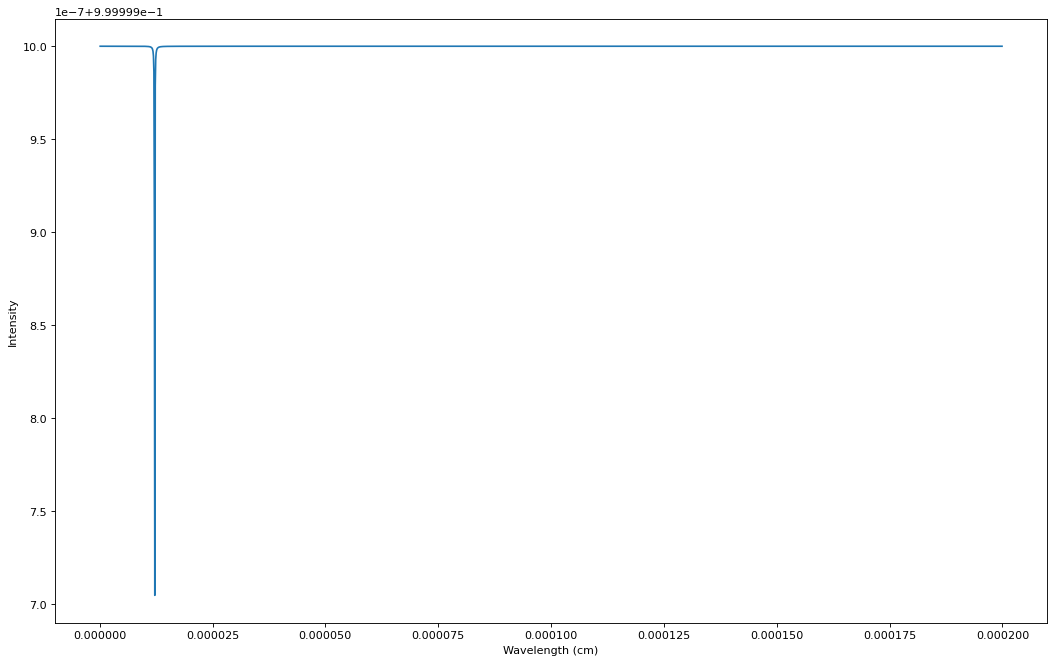

In [26]:
spectrum_plot(10.0E14, 2.46632E15)

Plotting for 10<sup>18</sup> with updated v<sub>0</sub> value

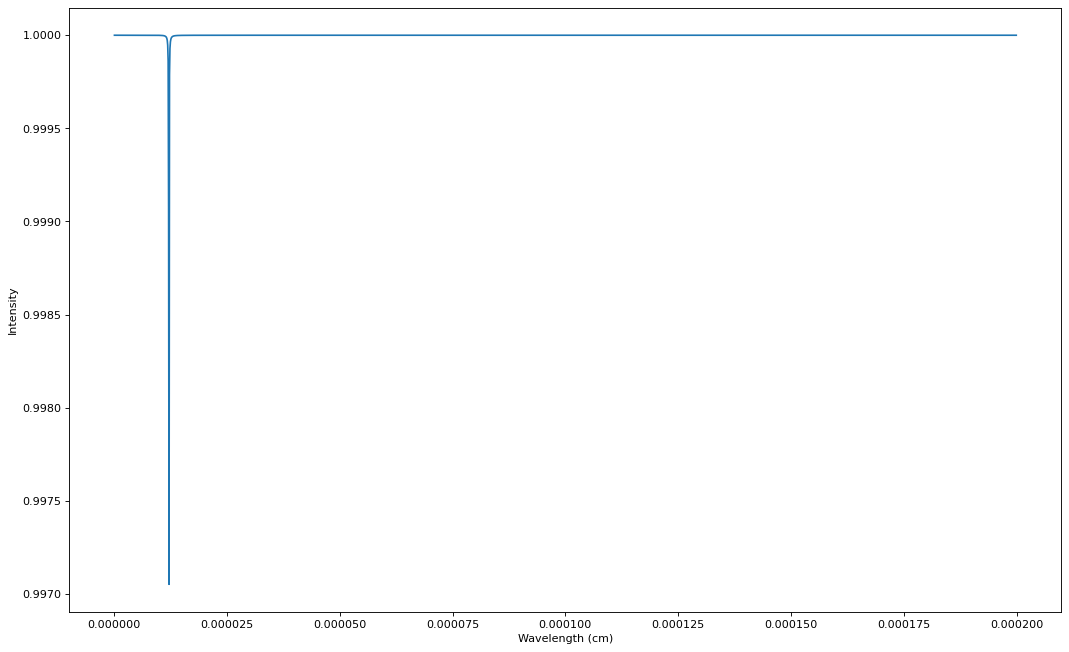

In [27]:
spectrum_plot(10.0E18, 2.46632E15)

Plotting for 10<sup>21</sup> with updated v<sub>0</sub> value

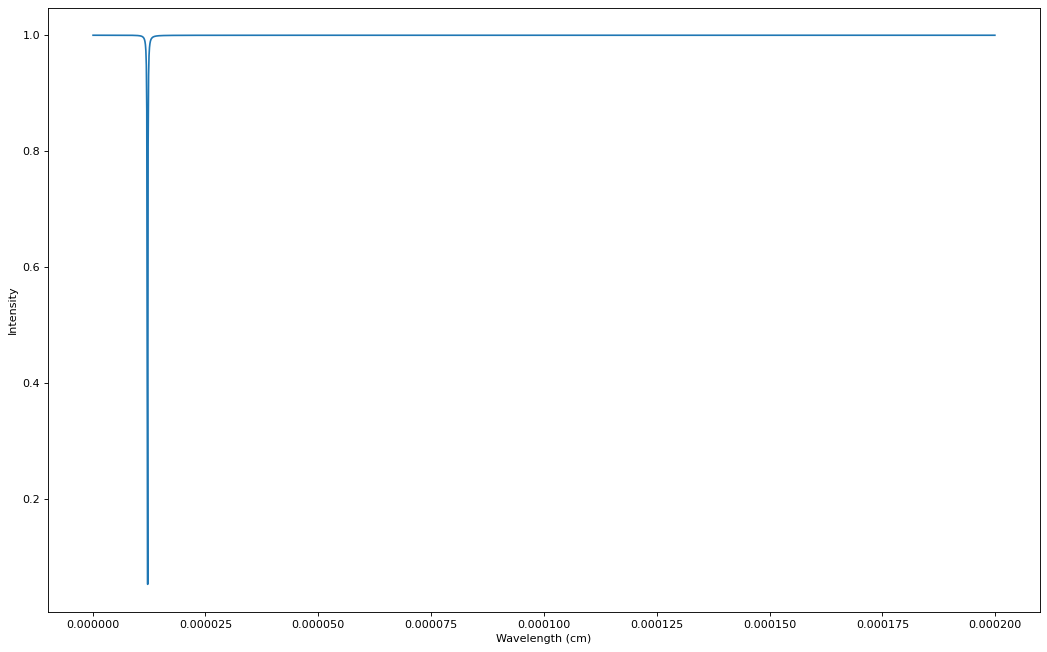

In [28]:
spectrum_plot(10.0E21, 2.46632E15)

**Part 3**

Looking at the plots, they all look the same with no specific difference. Although implementation was checked several times to make sure that the forumulas are coded properly. A wide wavelength range was used to cover it completely, but that also did not cause any difference.

# Task 3 -  HIGGS Dataset Classification and Dimensionality Reduction

## Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import normalize, LabelEncoder, StandardScaler

# Loading the Dataset

In [2]:
df = pd.read_csv("HIGGS.csv", header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [4]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [17]:
enc = LabelEncoder()
y = enc.fit_transform(y)

In [19]:
sscaler = StandardScaler()
X = sscaler.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

## Creating and Training the XGBoost Model

- Several models were tried and evaluated based on how well they perform and how well they handle overfitting.
- Although there were some models providing better accuracies, but `XGBoost` proved to be best in both providing an optimal accuracy and minimizing overfitting.

In [15]:
model = XGBClassifier()

In [16]:
model.fit(X_train,y_train)
pickle.dump(model, open("xgboost_model.pickle.dat", "wb"))

[09:22:22] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


In [12]:
model = pickle.load(open("xgboost_model.pickle.dat", "rb"))

In [17]:
y_pred_test = model.predict(X_test)

In [18]:
accuracy_score(y_test, y_pred_test)

0.7025068181818181

In [19]:
y_pred_train = model.predict(X_train)

In [20]:
accuracy_score(y_train, y_pred_train)

0.7022294318181819

### Testing on last 500k rows

In [20]:
df_6M = df.head(n=6000000)

In [21]:
df_6M_train = df_6M.head(5500000)

In [29]:
sscaler = StandardScaler()

In [30]:
train_X_6M = df_6M_train.iloc[:,1:]
train_X_6M = sscaler.fit_transform(train_X_6M)
train_y_6M = df_6M_train.iloc[:,0]

In [25]:
df_6M_test = df_6M.tail(500000)

In [31]:
test_X_6M = df_6M_test.iloc[:,1:]
test_X_6M = sscaler.fit_transform(test_X_6M)
test_y_6M = df_6M_test.iloc[:,0]

In [32]:
model = XGBClassifier()

In [33]:
model.fit(train_X_6M,train_y_6M)

[09:12:24] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [34]:
# Test Accuracy
accuracy_score(test_y_6M, model.predict(test_X_6M))

0.714038

In [35]:
# Train Accuracy
accuracy_score(train_y_6M, model.predict(train_X_6M))

0.7134207272727273

## Dimensionality Reduction

In [28]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation between different fearures')

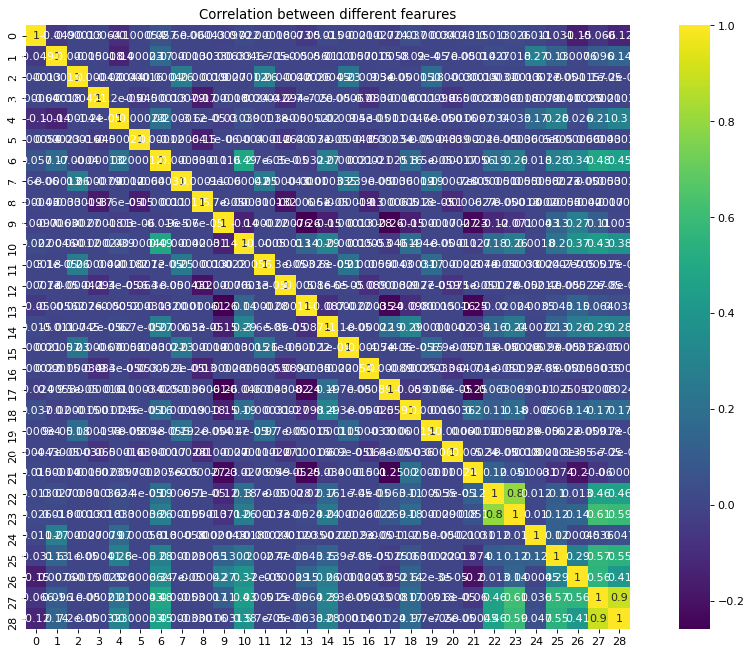

In [29]:
plt.figure(figsize=(16,10), dpi= 80)
correlation = df.corr()
#plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

In [5]:
pca = PCA()
pca.fit_transform(X)

array([[ 2.37588413e+00, -1.40848072e+00, -9.87583802e-02, ...,
        -9.30674710e-02,  2.61639870e-02, -4.98485168e-02],
       [-1.00133451e+00, -1.17815301e+00, -1.97463279e+00, ...,
         1.36183530e-02, -8.75392642e-02, -9.11670786e-02],
       [-1.46140860e+00,  2.60207883e+00,  1.03877046e+00, ...,
         1.01052557e-01, -6.21568097e-02, -9.54552415e-04],
       ...,
       [-1.11283970e+00,  2.08201391e+00, -2.03461526e+00, ...,
        -1.04776130e-03, -2.30256243e-02, -7.89225904e-03],
       [-5.83522464e-01,  9.56872917e-02, -1.02160119e+00, ...,
         1.21177216e-01,  1.33758789e-02, -6.71757103e-02],
       [-9.20517152e-01, -2.25655857e+00, -1.89600142e+00, ...,
        -3.17351472e-02, -1.53369946e-02,  7.41684997e-03]])

In [7]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.11581302, 0.09659324, 0.08451179, 0.07000956, 0.0641502 ,
       0.05651781, 0.055588  , 0.05446682, 0.05291956, 0.04468113,
       0.04248516, 0.04108151, 0.03885671, 0.03775394, 0.0255504 ,
       0.02181292, 0.01979832, 0.0185323 , 0.0164828 , 0.01047363,
       0.00779365, 0.00702242, 0.00586635, 0.00531234, 0.00300572,
       0.00135565, 0.00109707, 0.00046801])

Keeping a threshold for `95% variance` and checking how many components will accomplish that.

In [8]:
explained_variance[:19].sum()

0.957605182123589

It is clear that `19` components give us with over `95% variance`, therefore reducing dimensions to `19`.

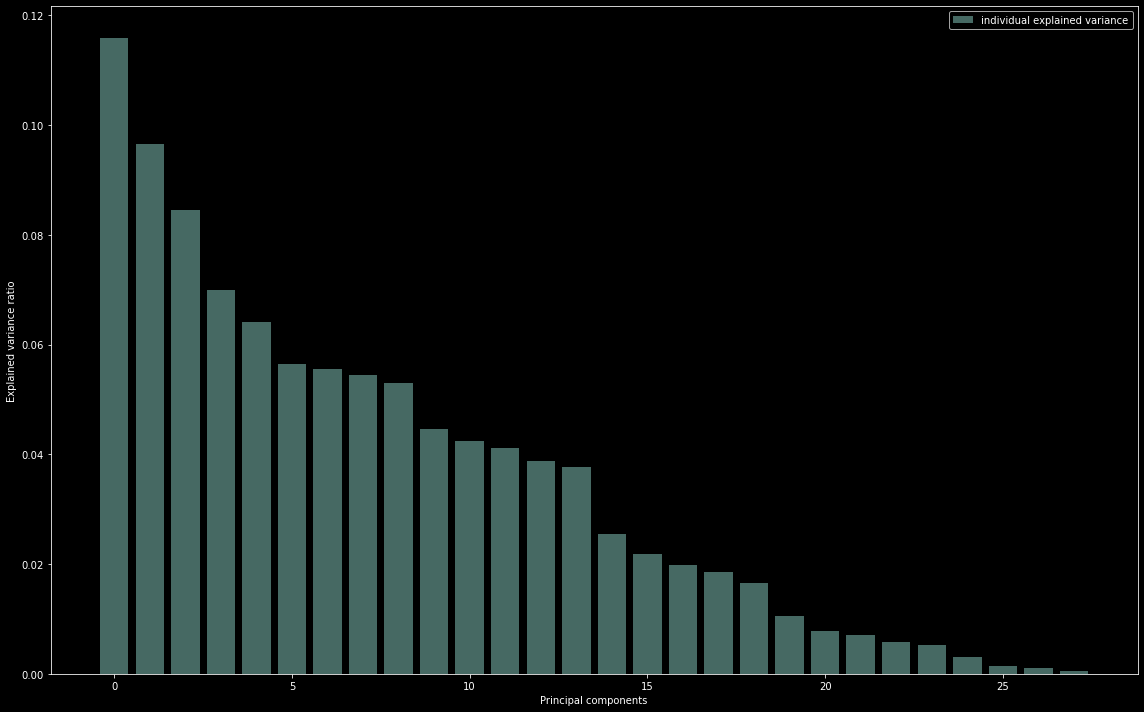

In [11]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(16, 10))

    plt.bar(range(28), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

### Reducing Dimensions to 19 and observing results

In [21]:
ipca = IncrementalPCA(n_components=19, batch_size=1000)

In [23]:
dim_model = XGBClassifier()

In [24]:
X_train_transformed = ipca.fit_transform(X_train)

In [25]:
X_test_transformed = ipca.transform(X_test)

In [26]:
dim_model.fit(X_train_transformed, y_train)
pickle.dump(dim_model, open("red_dim_xgboost_model.pickle.dat", "wb"))

[10:45:06] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


In [25]:
pickle.dump(dim_model, open("red_dim_xgboost_model.pickle.dat", "wb"))

In [27]:
new_y_train_pred = dim_model.predict(X_train_transformed)

In [28]:
accuracy_score(y_train, new_y_train_pred)

0.6153930681818182

In [29]:
new_y_test_pred = dim_model.predict(X_test_transformed)

In [30]:
accuracy_score(y_test, new_y_test_pred)

0.6150436363636363

The above result shows that although the model is still not overfitting, but it has significantly lost its accuracy. Therefore, it would not be possible to use 19 components.

In [48]:
test_probs = dim_model.predict_proba(X_test_transformed)

In [49]:
logit_roc_auc = roc_auc_score(y_test, new_y_test_pred)

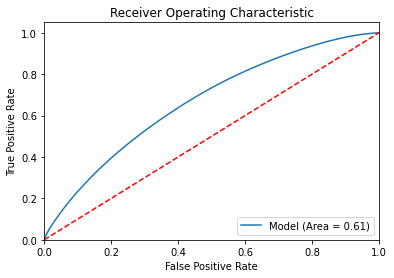

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, test_probs[:,1]) 
plt.figure()
plt.plot(fpr, tpr, label='Model (Area = %0.2f)' % logit_roc_auc) 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('XGBoost_ROC')
plt.show()

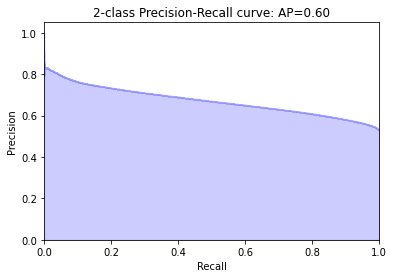

In [51]:
average_precision = average_precision_score(y_test, new_y_test_pred)
# Plot PR
precision, recall, _ = precision_recall_curve(y_test,  test_probs[:,1])
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.savefig('XGBoost_PR')
plt.show()

### Trying to improve accuracy by using 20 Features

In [35]:
explained_variance[:20].sum()


0.9680788085817921

In [6]:
ipca = IncrementalPCA(n_components=20, batch_size=1000)

In [12]:
X_train_transformed = ipca.fit_transform(X_train)

In [8]:
X_test_transformed = ipca.fit_transform(X_test)

In [10]:
dim_model = XGBClassifier()

In [13]:
dim_model.fit(X_train_transformed, y_train)
pickle.dump(dim_model, open("red20_dim_xgboost_model.pickle.dat", "wb"))

[10:12:38] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


In [14]:
new_y_train_pred = dim_model.predict(X_train_transformed)

In [15]:
accuracy_score(y_train, new_y_train_pred)

0.6282880681818181

In [16]:
new_y_test_pred = dim_model.predict(X_test_transformed)

In [17]:
accuracy_score(y_test, new_y_test_pred)

0.6279590909090909

In [18]:
test_probs = dim_model.predict_proba(X_test_transformed)

In [20]:
logit_roc_auc = roc_auc_score(y_test, new_y_test_pred)

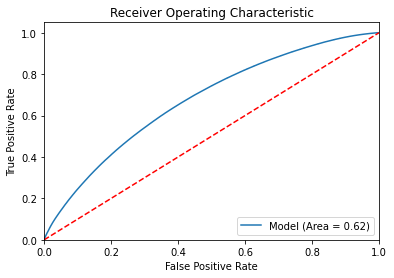

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, test_probs[:,1]) 
plt.figure()
plt.plot(fpr, tpr, label='Model (Area = %0.2f)' % logit_roc_auc) 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('XGBoost_ROC')
plt.show()

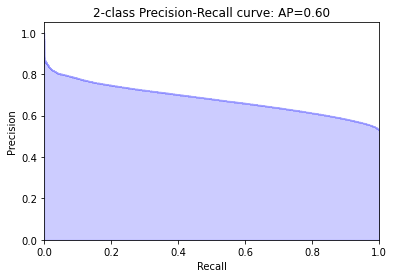

In [22]:
average_precision = average_precision_score(y_test, new_y_test_pred)
# Plot PR
precision, recall, _ = precision_recall_curve(y_test,  test_probs[:,1])
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.savefig('XGBoost_PR')
plt.show()

### Extending criteria to 99% Explained variance

In [9]:
# Using from earlier
explained_variance

array([0.11581302, 0.09659324, 0.08451179, 0.07000956, 0.0641502 ,
       0.05651781, 0.055588  , 0.05446682, 0.05291956, 0.04468113,
       0.04248516, 0.04108151, 0.03885671, 0.03775394, 0.0255504 ,
       0.02181292, 0.01979832, 0.0185323 , 0.0164828 , 0.01047363,
       0.00779365, 0.00702242, 0.00586635, 0.00531234, 0.00300572,
       0.00135565, 0.00109707, 0.00046801])

In [13]:
explained_variance[:24].sum()

0.9940735577263526

`24` components give 99% explained covariance, therefore proceeding with that to maintain accurancy.

In [14]:
ipca = IncrementalPCA(n_components=24, batch_size=1000)

In [15]:
X_train_transformed = ipca.fit_transform(X_train)

In [16]:
X_test_transformed = ipca.fit_transform(X_test)

In [17]:
dim_model = XGBClassifier()

In [18]:
dim_model.fit(X_train_transformed, y_train)
pickle.dump(dim_model, open("99var_dim_xgboost_model.pickle.dat", "wb"))

[17:05:14] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


In [19]:
new_y_train_pred = dim_model.predict(X_train_transformed)

In [20]:
accuracy_score(y_train, new_y_train_pred)

0.6480113636363637

In [22]:
new_y_test_pred = dim_model.predict(X_test_transformed)

In [23]:
accuracy_score(y_test, new_y_test_pred)

0.6480386363636363

In [21]:
test_probs = dim_model.predict_proba(X_test_transformed)

In [24]:
logit_roc_auc = roc_auc_score(y_test, new_y_test_pred)

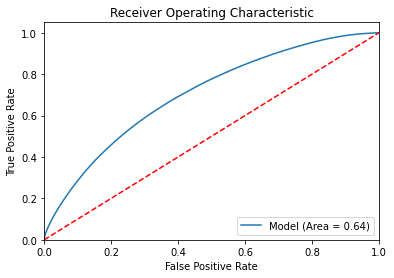

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, test_probs[:,1]) 
plt.figure()
plt.plot(fpr, tpr, label='Model (Area = %0.2f)' % logit_roc_auc) 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('XGBoost_ROC')
plt.show()

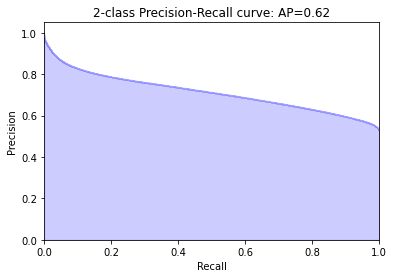

In [26]:
average_precision = average_precision_score(y_test, new_y_test_pred)
# Plot PR
precision, recall, _ = precision_recall_curve(y_test,  test_probs[:,1])
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.savefig('XGBoost_PR')
plt.show()

## Testing with Batch PCA

In [21]:
pca = PCA(n_components=20)

In [22]:
X_train_pca = pca.fit_transform(X_train)

In [23]:
model = XGBClassifier()

In [24]:
model.fit(X_train_pca, y_train)
pickle.dump(model, open("ss_dimRed20_xgboost_model.pickle.dat", "wb"))

[06:59:39] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


In [25]:
X_test_pca = pca.transform(X_test)

In [26]:
pred_test = model.predict(X_test_pca)

In [27]:
accuracy_score(y_test, pred_test)

0.627685